In [1]:
#import basic libraries
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import datetime 
from datetime import timedelta
import csv 
import matplotlib.pyplot as plt
from datetime import date
from datetime import time
from sklearn.datasets import load_iris
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
import seaborn as sns
from matplotlib import pyplot

#Data source: https://data.lacity.org/A-Well-Run-City/MyLA311-Service-Request-Data-2017/d4vt-q4t5
df1 = pd.read_csv(r"C:\Users\hanaa\Downloads\MyLA311_Service_Request_Data_2017.csv")
df2 = pd.read_csv(r"C:\Users\hanaa\Downloads\MyLA311_Service_Request_Data_2018.csv")
df3 = pd.read_csv(r"C:\Users\hanaa\Downloads\MyLA311_Service_Request_Data_2019.csv")

dfs = [df1, df2, df3]
df = pd.concat(dfs)
df = df.dropna()




C:\Users\hanaa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\hanaa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\hanaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [2]:
def convertTimeStamp(string):
    """Converts a string to a datetime object."""
    
    time = datetime.strptime(string,'%m/%d/%Y %I:%M:%S %p') #Accepts time string, converts it to datetime object.
    return time

df['CreatedDate'] = df['CreatedDate'].dropna().apply(convertTimeStamp,0)
df['ServiceDate'] = df['ServiceDate'].dropna().apply(convertTimeStamp, 0)

def prepareData(dataframe):
    """modeled from: https://github.com/ayush159/NYC-311/blob/master/NYC311.ipynb"""
    df['Elapsed Days'] = (df['ServiceDate'] - df['CreatedDate']).dt.days
    df_clean=df[df['Elapsed Days'].notnull()]
    df_perfect = df_clean[df_clean['ServiceDate'] >= df_clean['CreatedDate']]
    df_perfect['Day of Week'] = df_perfect['CreatedDate'].dt.dayofweek
    df_perfect['Day of Month'] = df_perfect['CreatedDate'].dt.day
    df_perfect['Month'] = df_perfect['CreatedDate'].dt.month
    df_perfect['Year'] = df_perfect['CreatedDate'].dt.year
    return df_perfect

df_LA = prepareData(df)

C:\Users\hanaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\hanaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\hanaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [3]:
#split dataframe in two for at most 7 elapsed days and more than 7 elapsed days
is_week = df_LA['Elapsed Days'] <= 7
df_week = df_LA[is_week]
#print(df_week.head())


(-118.6905900943105, -118.1259930056895, 33.66976934440257, 34.36334686669743)

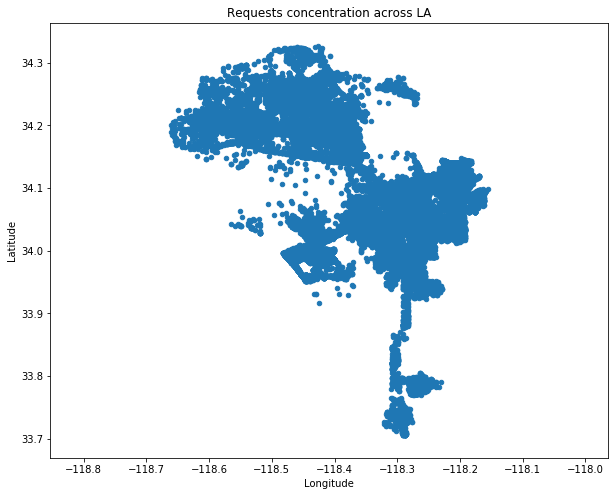

In [4]:
df_week[['Longitude', 'Latitude']].plot(kind='scatter',
    x='Longitude', y='Latitude', figsize=(10,8),title = 'Requests concentration across LA').axis('equal')

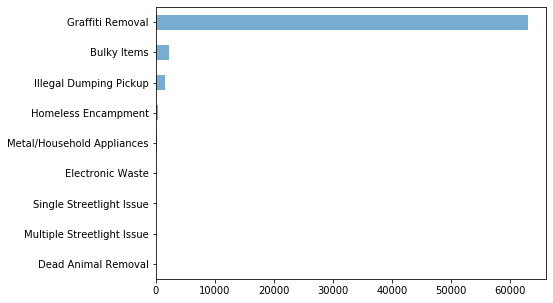

In [5]:
#groupedby_requesttype = df_week.groupby('RequestType')
#grp_data = groupedby_requesttype.get_group('Graffiti Removal')
    
df_week['RequestType'].value_counts().sort_values(ascending=True).plot(kind='barh',alpha=0.6,figsize=(7,5))
plt.show()


C:\Users\hanaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(-118.66091930050526, -118.15566379949475, 33.7064374, 34.32448397)

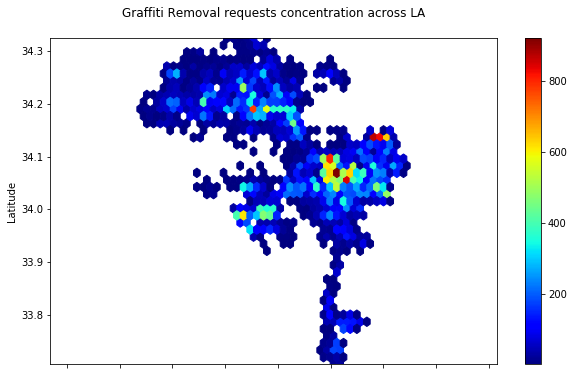

In [6]:
df_week_graffiti = df_week[df_week['RequestType'] == 'Graffiti Removal']
df_week_graffiti[df_week['RequestType'] == 'Graffiti Removal'].plot(
    kind='hexbin', x='Longitude', y='Latitude', gridsize=40,title = 'Graffiti Removal requests concentration across LA\n',
     colormap='jet',mincnt=1, figsize=(10,6)).axis('equal')

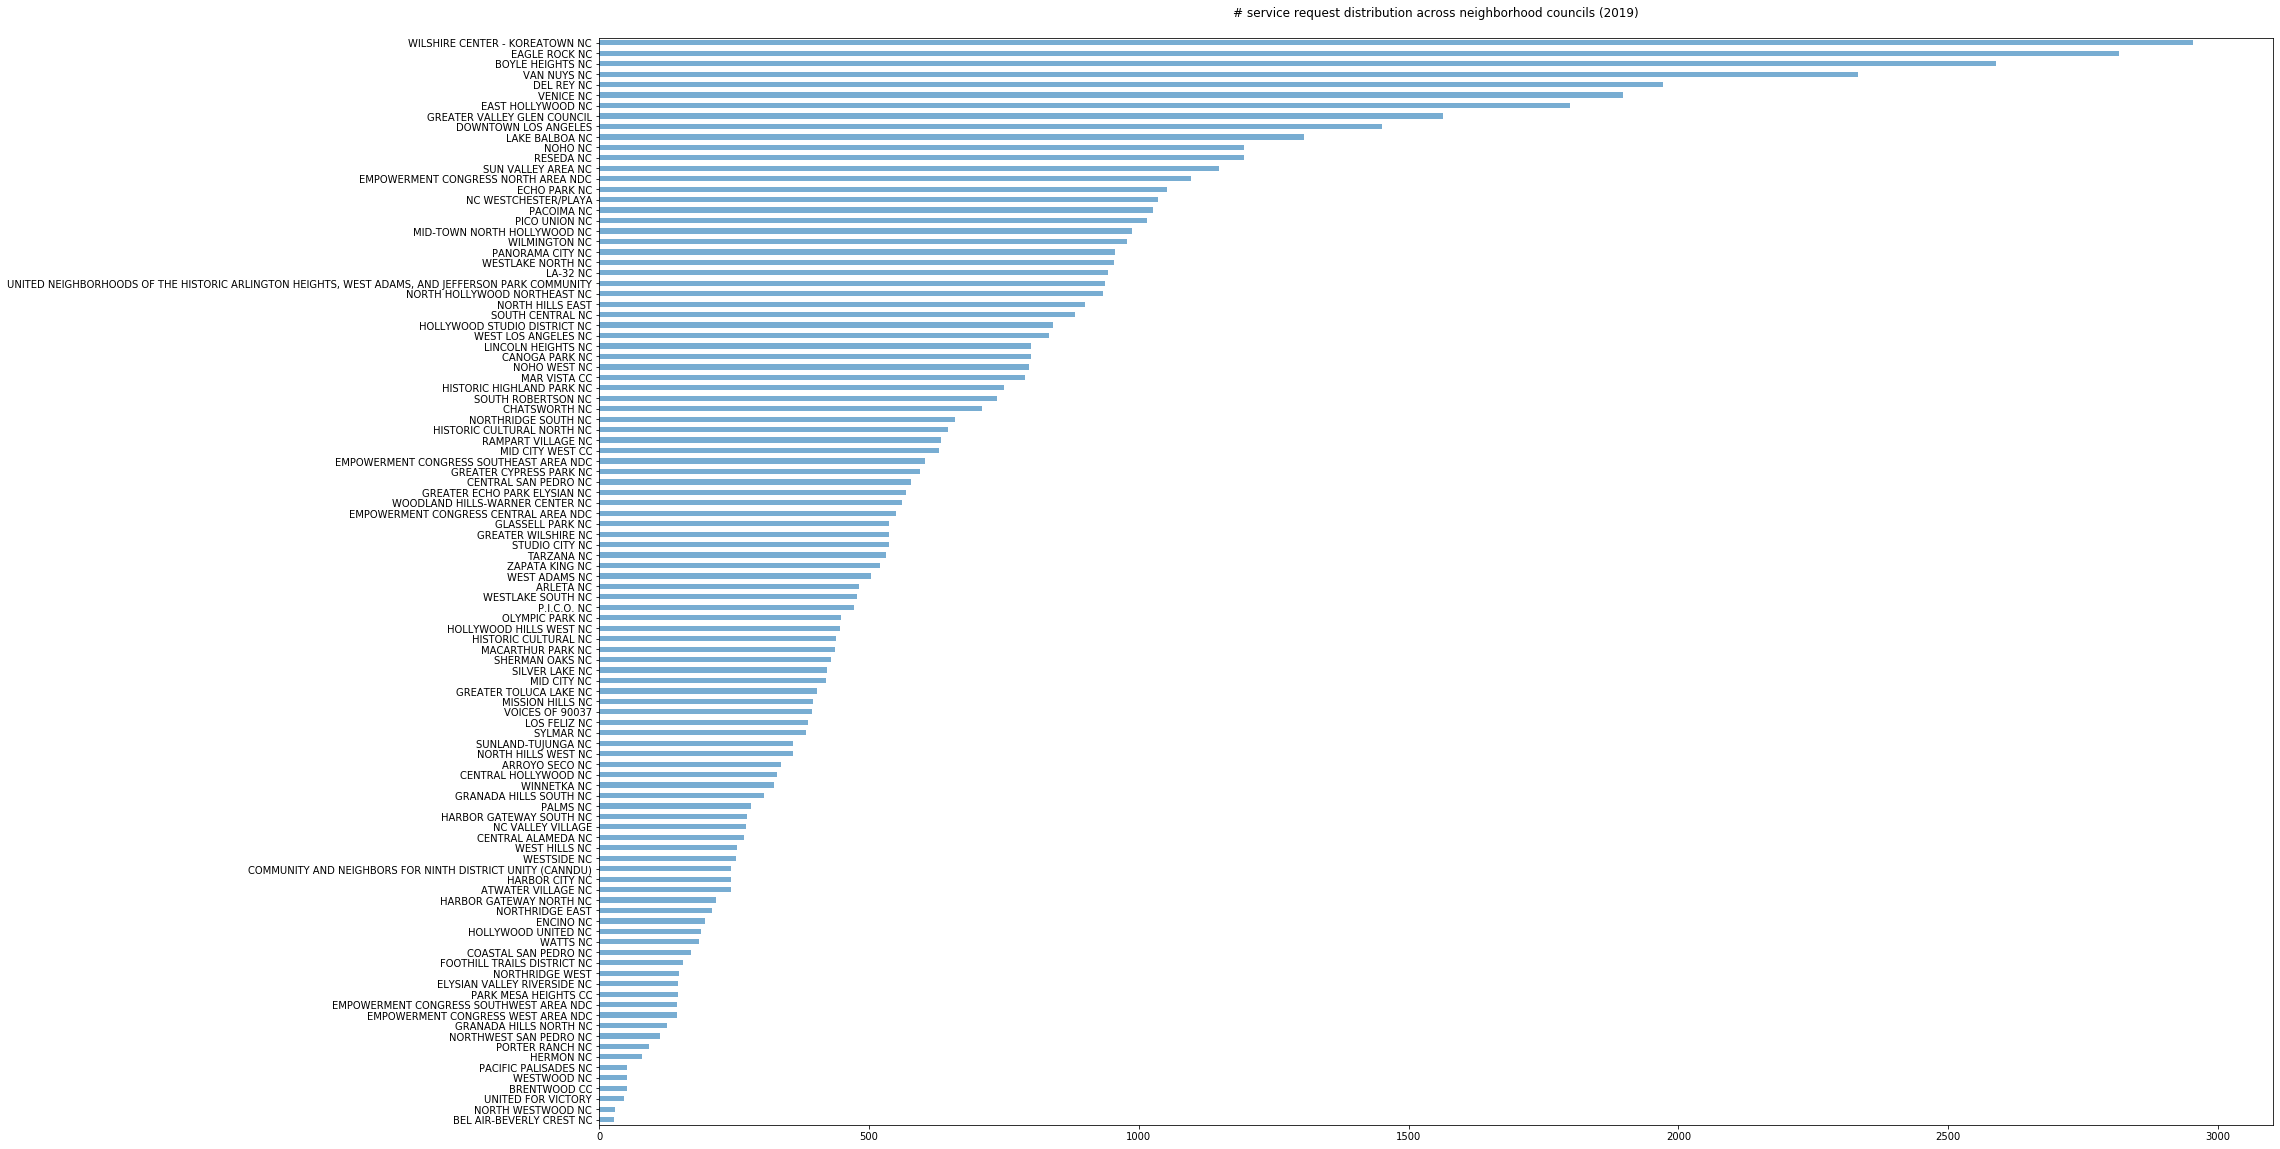

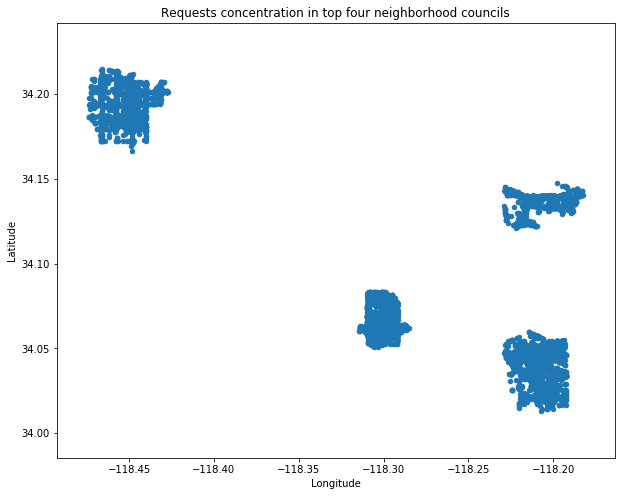

In [7]:
df_week['NCName'].value_counts().sort_values(ascending=True).plot(kind='barh',alpha=0.6,figsize=(30,20))
plt.title('# service request distribution across neighborhood councils (2019)\n')
plt.show()

most_NC = ['WILSHIRE CENTER - KOREATOWN NC', 'EAGLE ROCK NC', 'BOYLE HEIGHTS NC', 'VAN NUYS NC']

is_NC = df_week['NCName'].isin(most_NC)
df_NC = df_week[is_NC]

ax = df_NC[['Longitude', 'Latitude']].plot(kind='scatter',
    x='Longitude', y='Latitude', figsize=(10,8),title = 'Requests concentration in top four neighborhood councils').axis('equal')

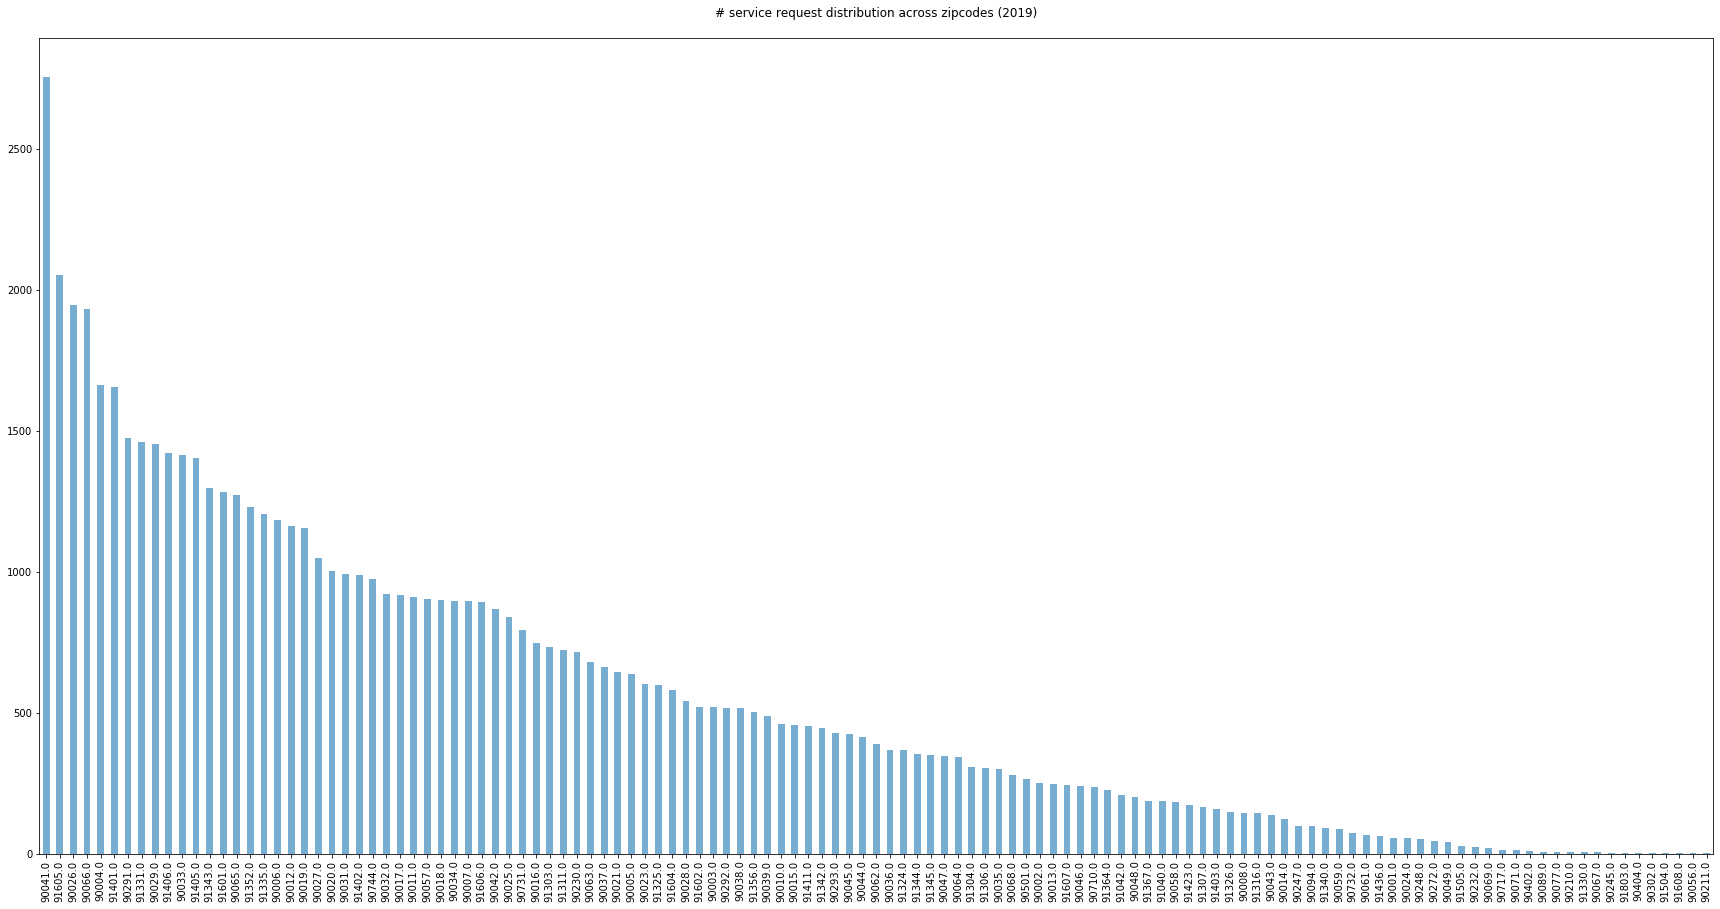

(-118.47085794931047,
 -118.23351405068951,
 33.95428744745757,
 34.23957504254242)

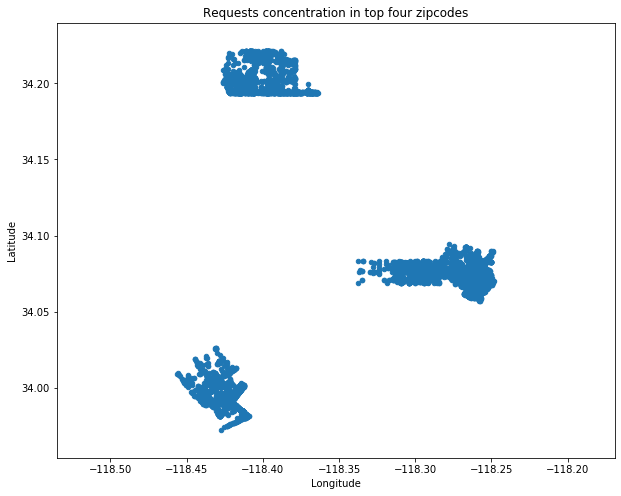

In [8]:
df_week['ZipCode'].value_counts().sort_values(ascending=False).plot(kind='bar',alpha=0.6,figsize=(30,15))
plt.title('# service request distribution across zipcodes (2019)\n')
plt.show()

most_zip = [90004, 91605, 90026, 90066]

is_zipcode = df_week['ZipCode'].isin(most_zip)
df_zipcode = df_week[is_zipcode]

df_zipcode[['Longitude', 'Latitude']].plot(kind='scatter',
    x='Longitude', y='Latitude', figsize=(10,8),title = 'Requests concentration in top four zipcodes').axis('equal')


(-118.49269888931049, -118.1637065106895, 33.95428744745757, 34.23957504254242)

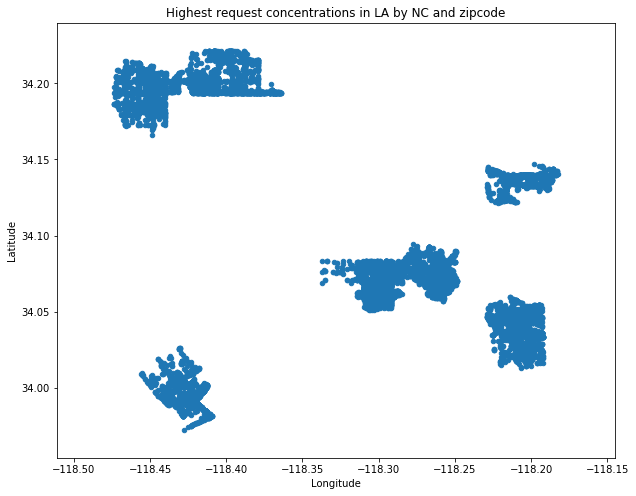

In [9]:
df_area = df_week[is_NC | is_zipcode]

df_area[['Longitude', 'Latitude']].plot(kind='scatter',
    x='Longitude', y='Latitude', figsize=(10,8),title = 'Highest request concentrations in LA by NC and zipcode').axis('equal')